In [1]:
import pandas as pd 

In [2]:
file = "data/ldw_2023_pilot_coding_tasks_outputs_processed_2.csv"

df = pd.read_csv(file)

In [3]:
robotarm_l1 = df[df['Activity ID'] == 'P1M120']
robotarm_l1 = robotarm_l1.dropna(subset=['WorldSpace'])

In [53]:
KEY_VECTOR_L1 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeA,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"

V1 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,E,', 'ra-world-shape ra-world-shapeA,E,E,E,E,false']"


In [54]:
from distances import *

In [115]:
goal_matrix = preprocess(KEY_VECTOR_L1)

In [116]:
initial_matrix = preprocess(V1)

In [123]:
goal_indices = np.argwhere(goal_matrix == 'A')
initial_indices = np.argwhere(initial_matrix == 'A')

In [124]:
from itertools import permutations

init_permutations_indices = permutations(initial_indices)
goal_permutations_indices = permutations(goal_indices)

In [129]:
distances = []

init_permutations_indices = list(init_permutations_indices)
goal_permutations_indices = list(goal_permutations_indices)

for init_perm in init_permutations_indices:
    for goal_perm in goal_permutations_indices:
        # Calculate Euclidean distance for the current permutation
        distance = [np.linalg.norm(goal_index - initial_index) for goal_index, initial_index in zip(np.array(goal_perm), np.array(init_perm))]
        distance = sum(distance)
        distances.append(distance)

In [131]:
min_distance = min(distances)

In [132]:
min_distance

8.0

## Testing with goal state

In [133]:
goal_matrix = preprocess(KEY_VECTOR_L1)

initial_matrix = preprocess(KEY_VECTOR_L1)

goal_indices = np.argwhere(goal_matrix == 'A')
initial_indices = np.argwhere(initial_matrix == 'A')

init_permutations_indices = permutations(initial_indices)
goal_permutations_indices = permutations(goal_indices)

distances = []

init_permutations_indices = list(init_permutations_indices)
goal_permutations_indices = list(goal_permutations_indices)

for init_perm in init_permutations_indices:
    for goal_perm in goal_permutations_indices:
        # Calculate Euclidean distance for the current permutation
        distance = [np.linalg.norm(goal_index - initial_index) for goal_index, initial_index in zip(np.array(goal_perm), np.array(init_perm))]
        distance = sum(distance)
        distances.append(distance)
        
        
min_distance = min(distances)

In [134]:
min_distance

0.0

## Testing V2

In [153]:
V2 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'ra-world-shape ra-world-shapeA,ra-world-shape ra-world-shapeA,E,E,E,false']"


goal_matrix = preprocess(KEY_VECTOR_L1)

initial_matrix = preprocess(V2)

goal_indices = np.argwhere(goal_matrix == 'A')
initial_indices = np.argwhere(initial_matrix == 'A')

init_permutations_indices = permutations(initial_indices)
goal_permutations_indices = permutations(goal_indices)

distances = []

init_permutations_indices = list(init_permutations_indices)
goal_permutations_indices = list(goal_permutations_indices)

for init_perm in init_permutations_indices:
    for goal_perm in goal_permutations_indices:
        # Calculate Euclidean distance for the current permutation
        distance = [np.linalg.norm(goal_index - initial_index) for goal_index, initial_index in zip(np.array(goal_perm), np.array(init_perm))]
        distance = sum(distance)
        distances.append(distance)
        
        
min_distance = min(distances)

In [154]:
min_distance

7.123105625617661

## Testing the lists

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


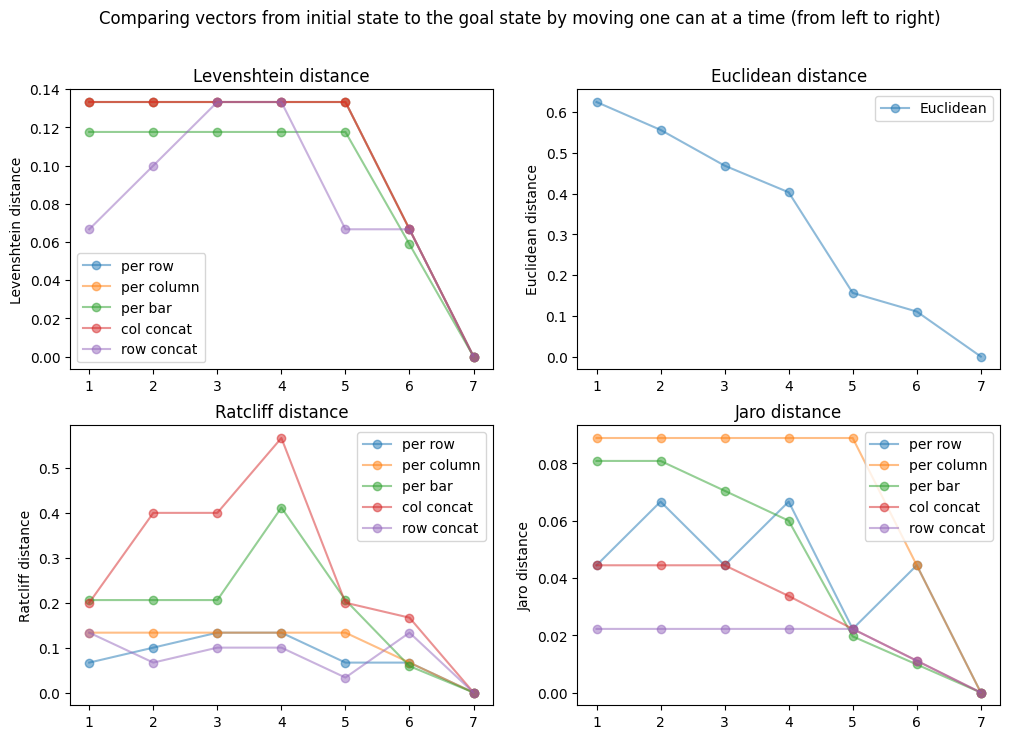

In [209]:
from plots import * 
from tests import *

%load_ext autoreload
%autoreload 2


test_comparing_metrics(LIST_VECTORS_1, KEY_VECTOR_V, "Comparing vectors from initial state to the goal state by moving one can at a time (from left to right)")

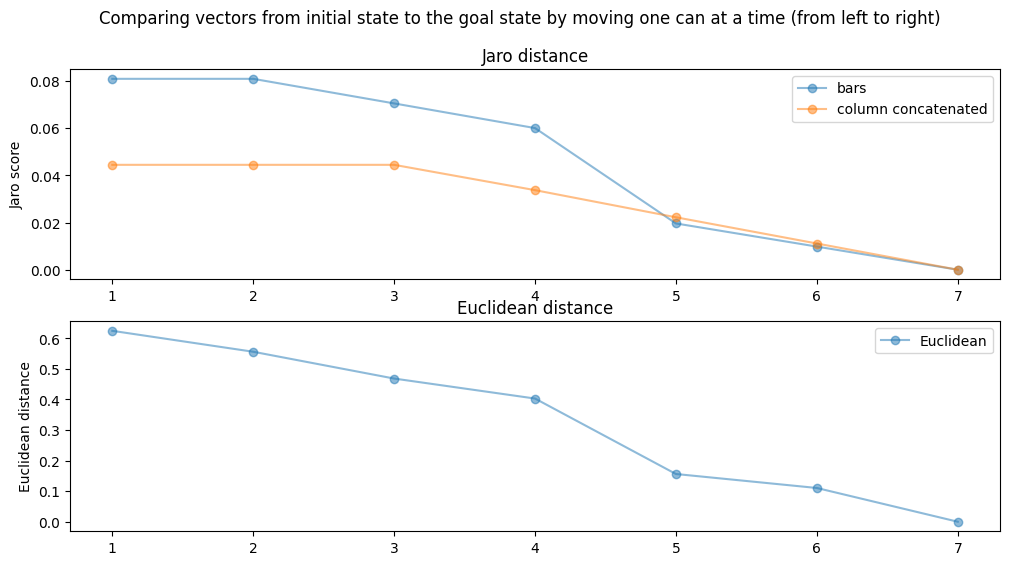

In [218]:
test_comparing_euclidean_jaro(LIST_VECTORS_1, KEY_VECTOR_V, "Comparing vectors from initial state to the goal state by moving one can at a time (from left to right)")

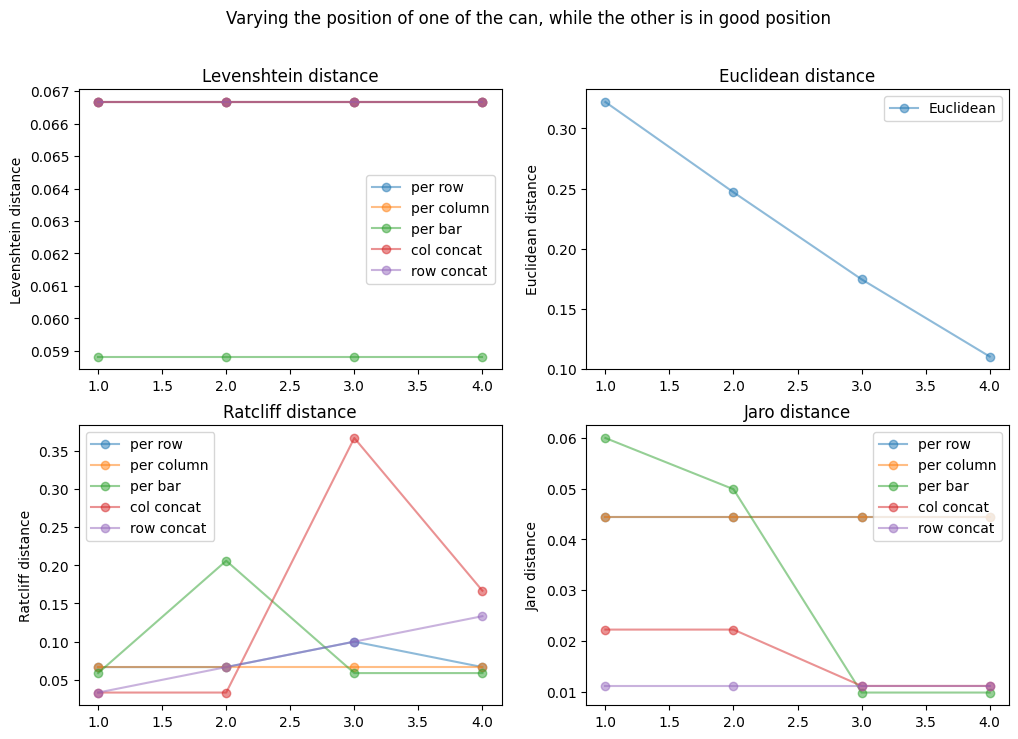

In [163]:
test_comparing_metrics(LIST_VECTORS_2, KEY_VECTOR_V, "Varying the position of one of the can, while the other is in good position")

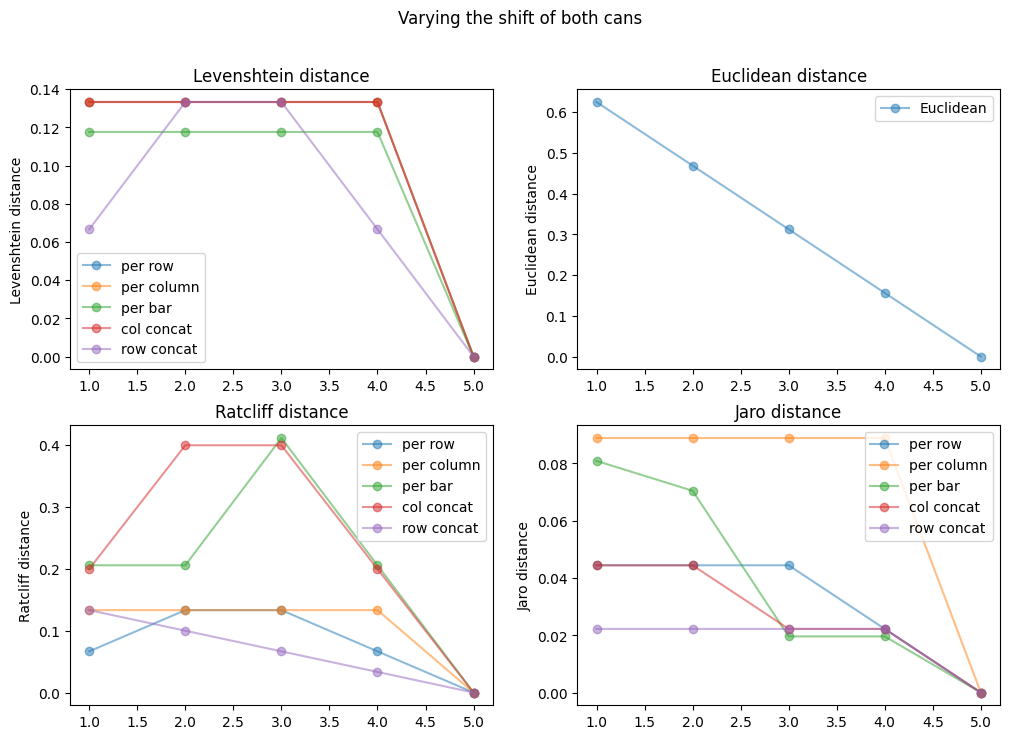

In [164]:
test_comparing_metrics(LIST_VECTORS_3, KEY_VECTOR_V, "Varying the shift of both cans")

## Testing with 1 can and 1 glass

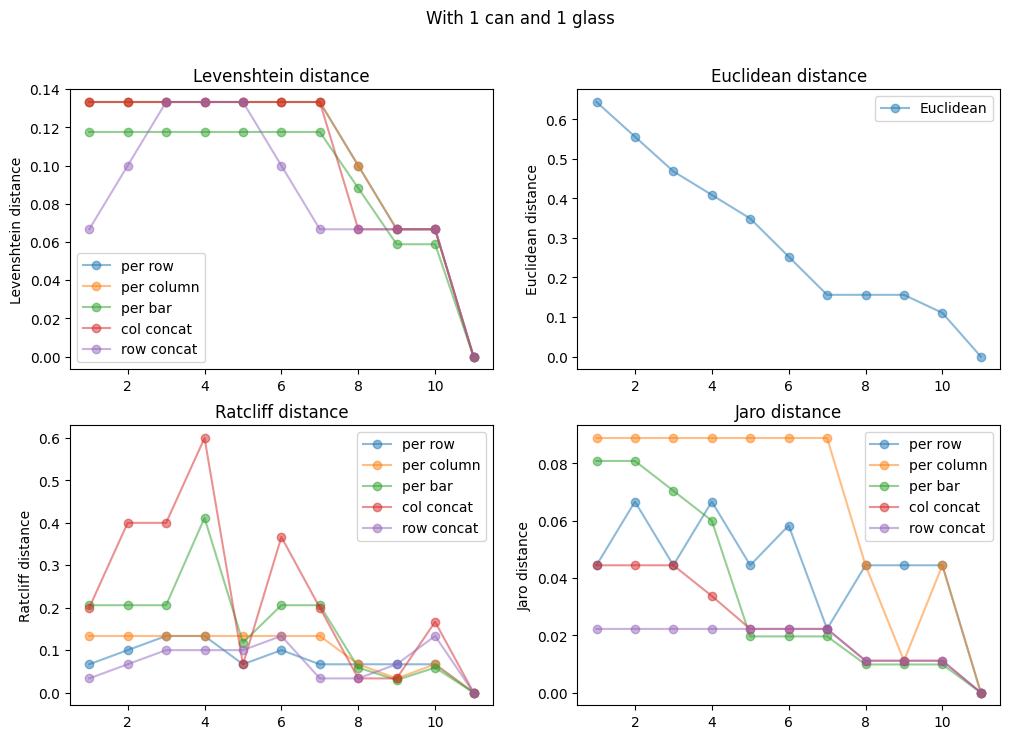

In [165]:
test_comparing_metrics(LIST_VECTOR_W, KEY_VECTOR_W, "With 1 can and 1 glass")

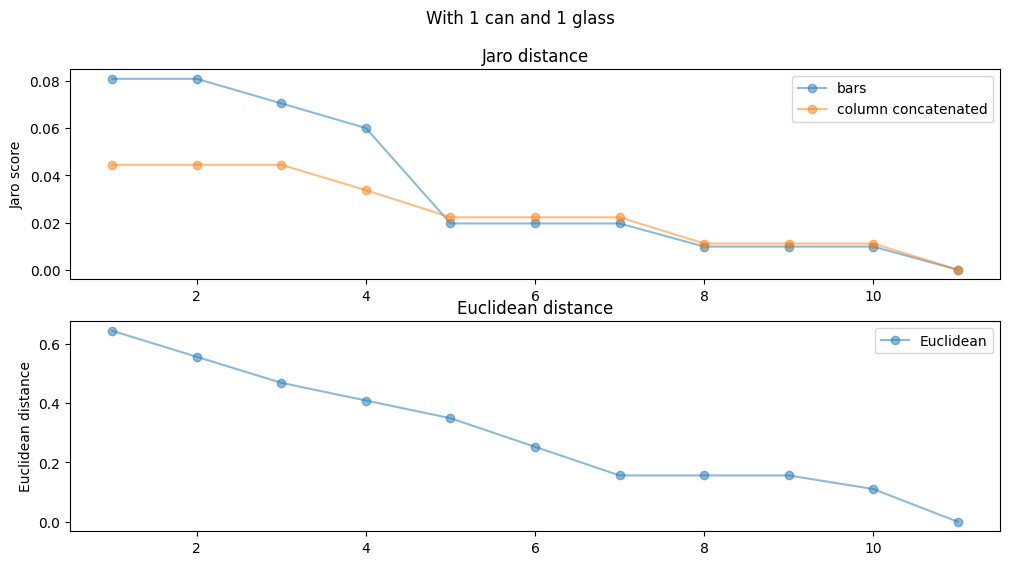

In [167]:
test_comparing_euclidean_jaro(LIST_VECTOR_W, KEY_VECTOR_W, "With 1 can and 1 glass")

In [149]:
W7 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,ra-world-shape ra-world-shapeA,E,', 'E,E,E,ra-world-shape ra-world-shapeB,E,false']"

euclidean(W7, KEY_VECTOR_W, print_results=True)

Minimum distance for A: 1.0
Minimum distance for B: 1.0
Total distance: 0.15617376188860607


0.15617376188860607

In [100]:
preprocess(W7)

array([['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'A', 'E'],
       ['E', 'E', 'E', 'B', 'E']], dtype='<U1')

In [87]:
W8 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,ra-world-shape ra-world-shapeB,ra-world-shape ra-world-shapeA,false']"

euclidean(W8, KEY_VECTOR_W, print_results=True)

Minimum distance for A: 1.0
Minimum distance for B: 1.0
Total distance: 0.15617376188860607


0.15617376188860607

In [101]:
preprocess(W8)

array([['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'B', 'A']], dtype='<U1')

In [88]:
W9 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,ra-world-shape ra-world-shapeB,', 'E,E,E,E,ra-world-shape ra-world-shapeA,false']"

euclidean(W9, KEY_VECTOR_W, print_results=True)

Minimum distance for A: 1.0
Minimum distance for B: 1.0
Total distance: 0.15617376188860607


0.15617376188860607

In [102]:
preprocess(W9)

array([['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'E'],
       ['E', 'E', 'E', 'E', 'B'],
       ['E', 'E', 'E', 'E', 'A']], dtype='<U1')

In [89]:
W10 = "['E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,E,E,', 'E,E,E,ra-world-shape ra-world-shapeA,ra-world-shape ra-world-shapeB,false']"

euclidean(W10, KEY_VECTOR_W, print_results=True)

Minimum distance for A: 1.4142135623730951
Minimum distance for B: 0.0
Total distance: 0.11043152607484655


0.11043152607484655

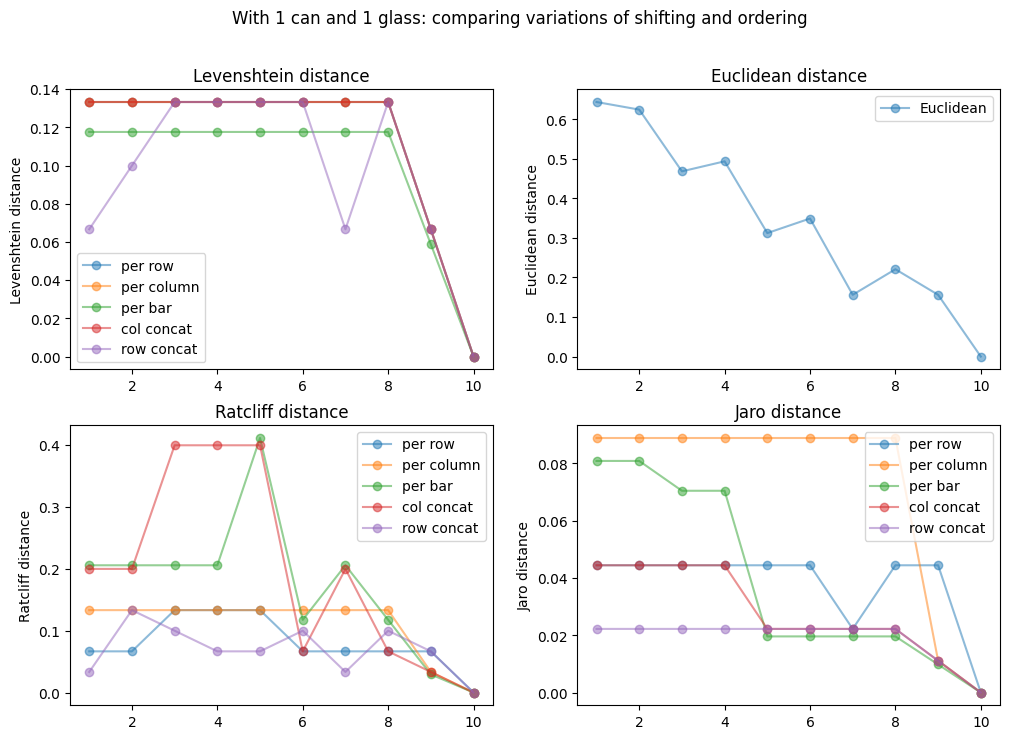

In [178]:
test_comparing_metrics(LIST_VECTOR_W2, KEY_VECTOR_W_MATRIX, "With 1 can and 1 glass: comparing variations of shifting and ordering", test=True)

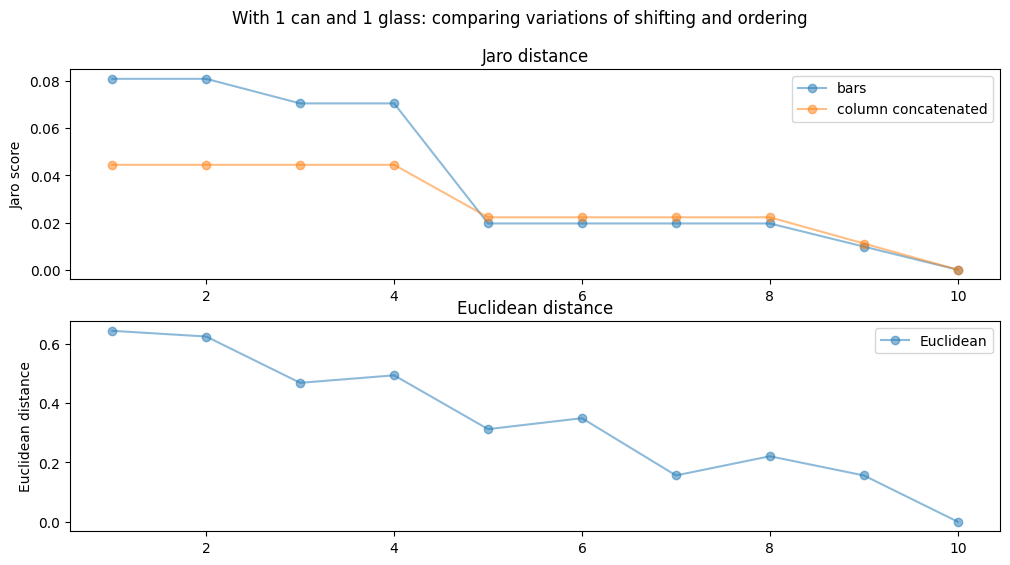

In [183]:
test_comparing_euclidean_jaro(LIST_VECTOR_W2, KEY_VECTOR_W_MATRIX, "With 1 can and 1 glass: comparing variations of shifting and ordering", test=True)

## Testing with 2 cans and 2 glasses 

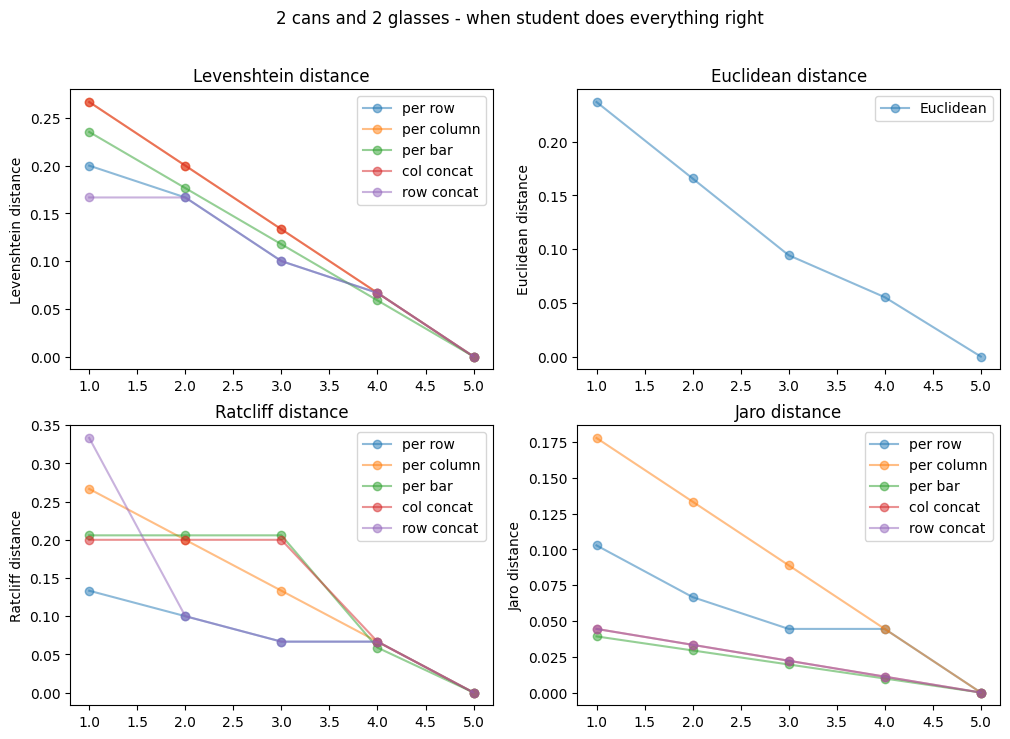

In [185]:
test_comparing_metrics(LIST_VECTOR_X1, KEY_VECTOR_X, "2 cans and 2 glasses - when student does everything right", test=True)

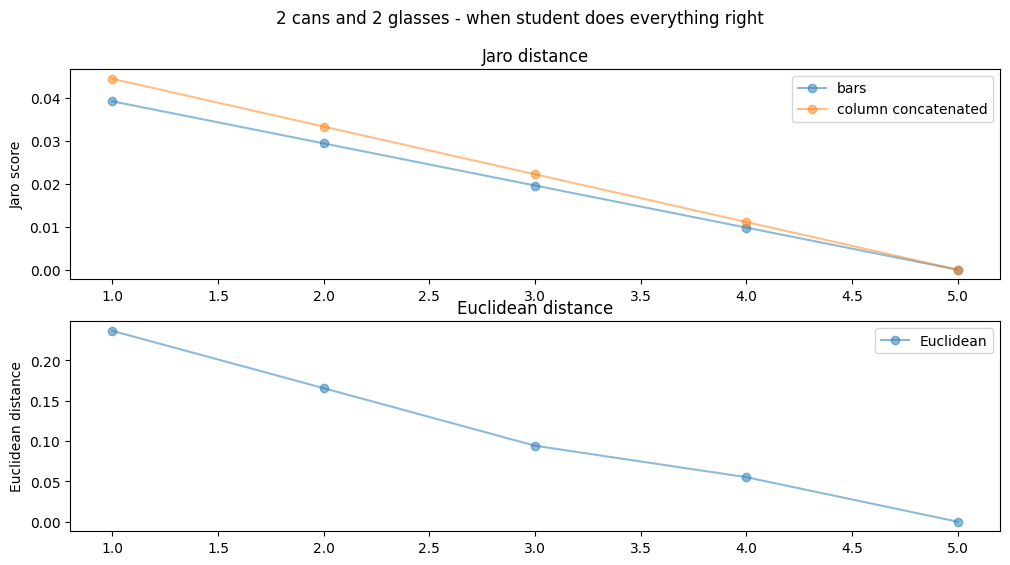

In [192]:
test_comparing_euclidean_jaro(LIST_VECTOR_X1, KEY_VECTOR_X, "2 cans and 2 glasses - when student does everything right", test=True)

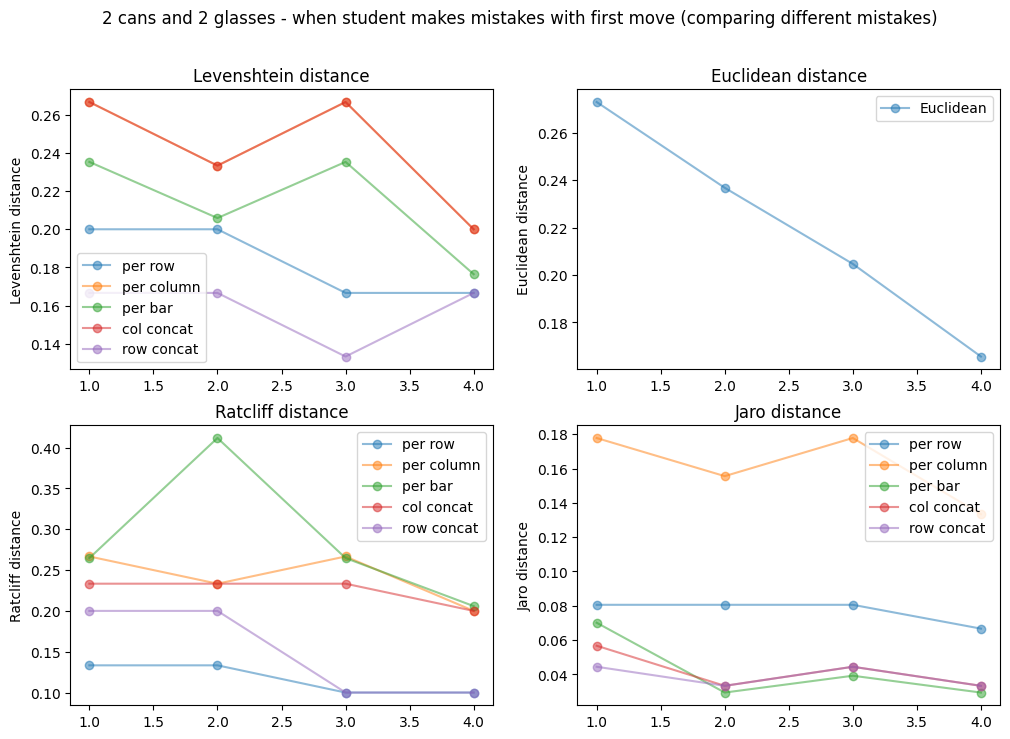

In [193]:
test_comparing_metrics(LIST_VECTOR_X2, KEY_VECTOR_X, "2 cans and 2 glasses - when student makes mistakes with first move (comparing different mistakes)", test=True)

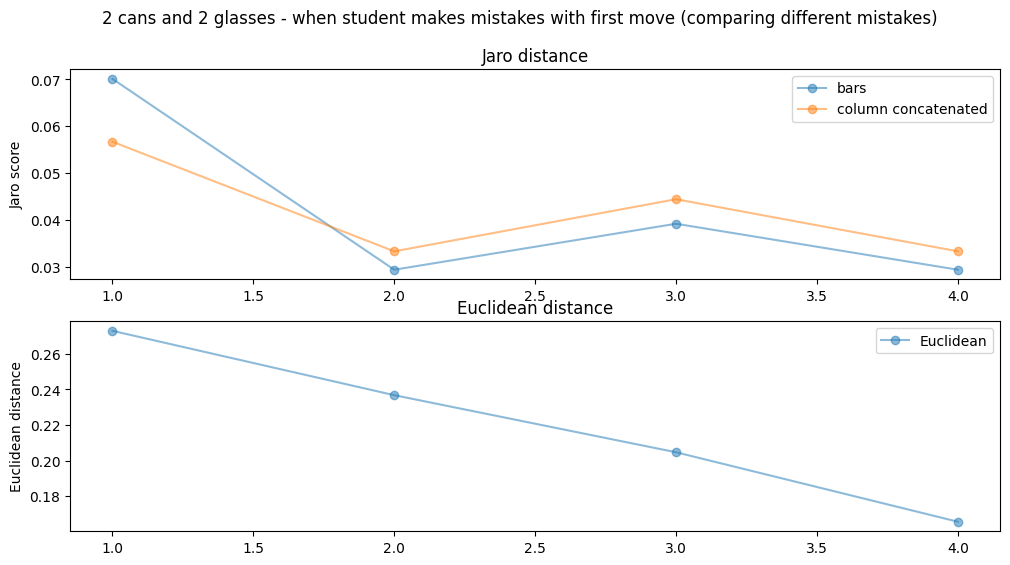

In [194]:
test_comparing_euclidean_jaro(LIST_VECTOR_X2, KEY_VECTOR_X, "2 cans and 2 glasses - when student makes mistakes with first move (comparing different mistakes)", test=True)

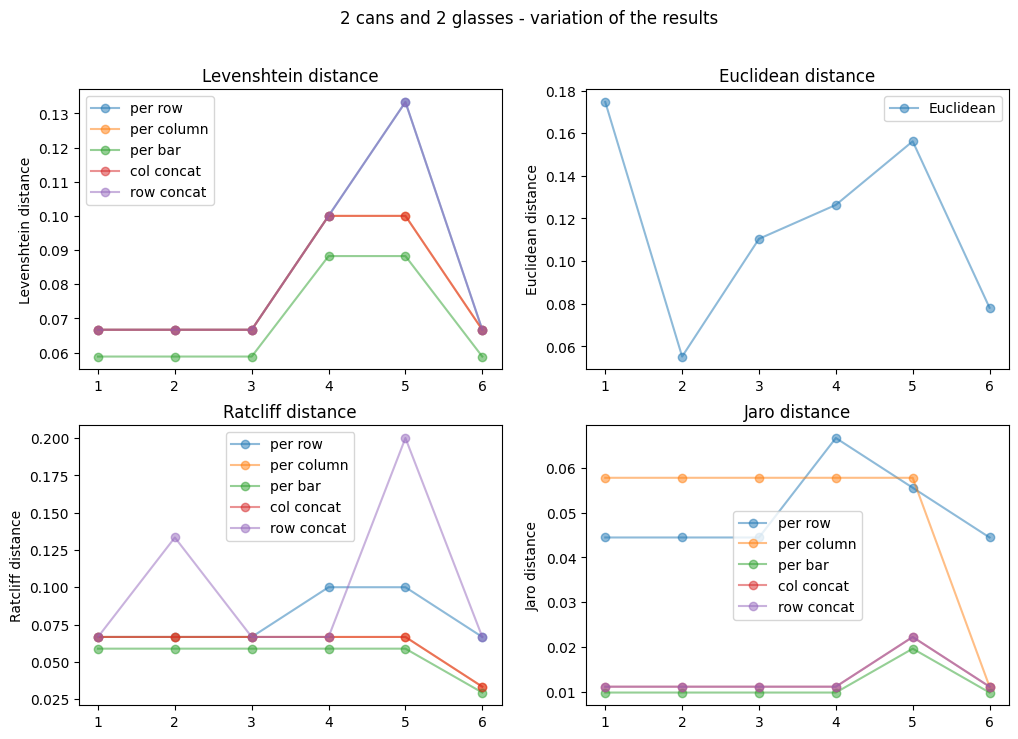

In [206]:
test_comparing_metrics(LIST_VECTOR_Z1, KEY_VECTOR_Z, "2 cans and 2 glasses - variation of the results", test=True)

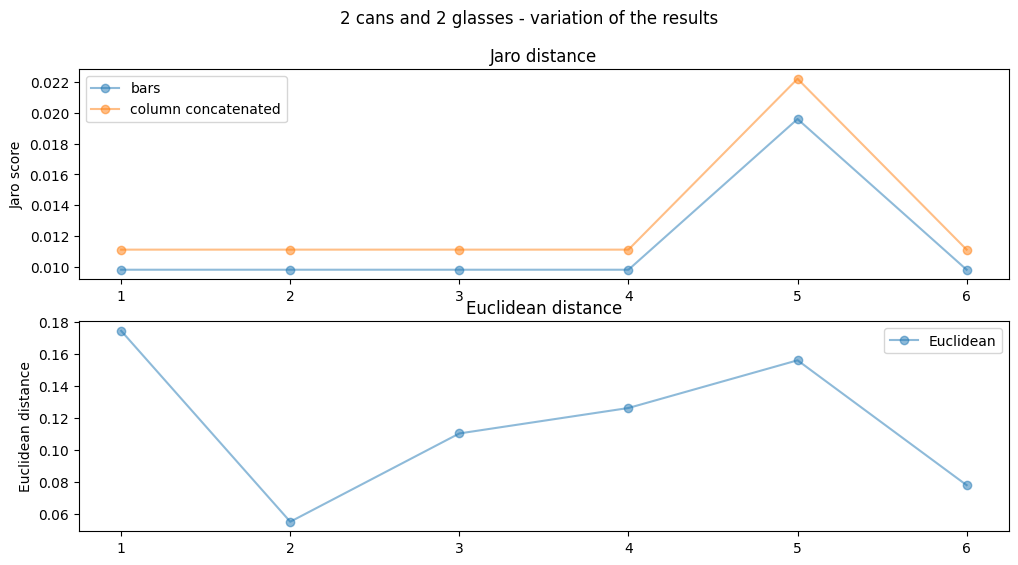

In [207]:
test_comparing_euclidean_jaro(LIST_VECTOR_Z1, KEY_VECTOR_Z, "2 cans and 2 glasses - variation of the results", test=True)

## Test cases for the learning task 3

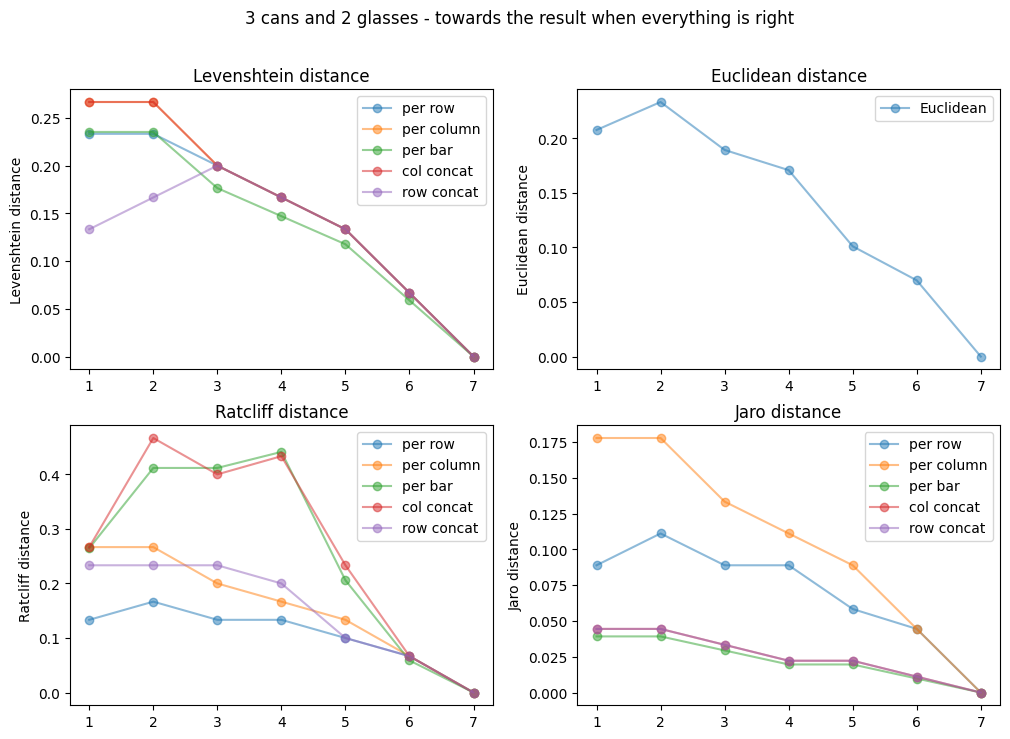

In [214]:
test_comparing_metrics(LIST_VECTOR_A1, KEY_VECTOR_A, "3 cans and 2 glasses - towards the result when everything is right", test=True)

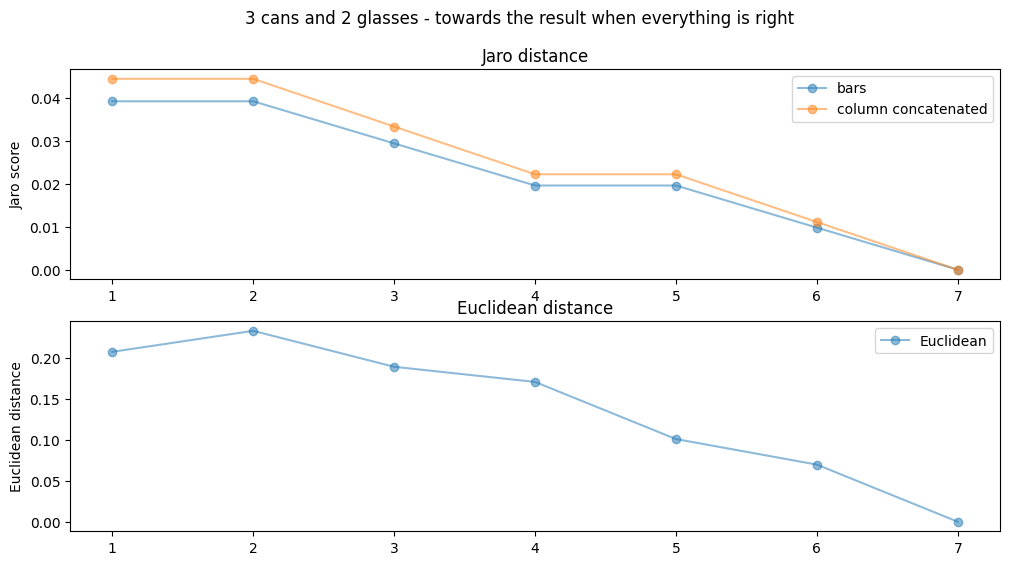

In [215]:
test_comparing_euclidean_jaro(LIST_VECTOR_A1, KEY_VECTOR_A, "3 cans and 2 glasses - towards the result when everything is right", test=True)

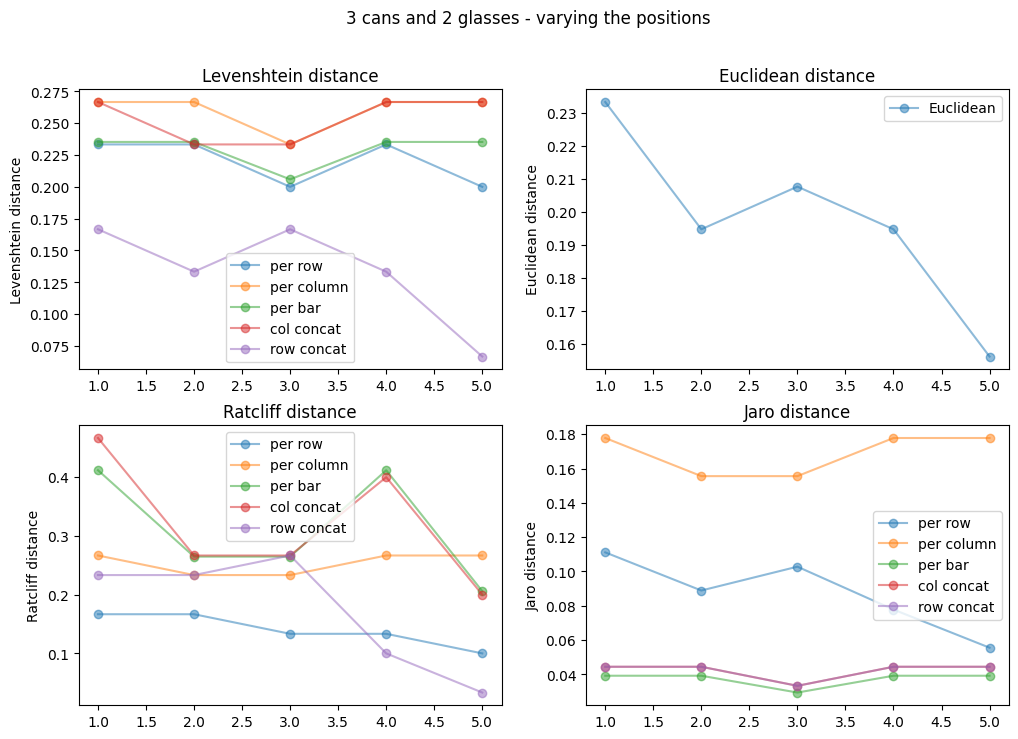

In [216]:
test_comparing_metrics(LIST_VECTOR_A2, KEY_VECTOR_A, "3 cans and 2 glasses - varying the positions", test=True)

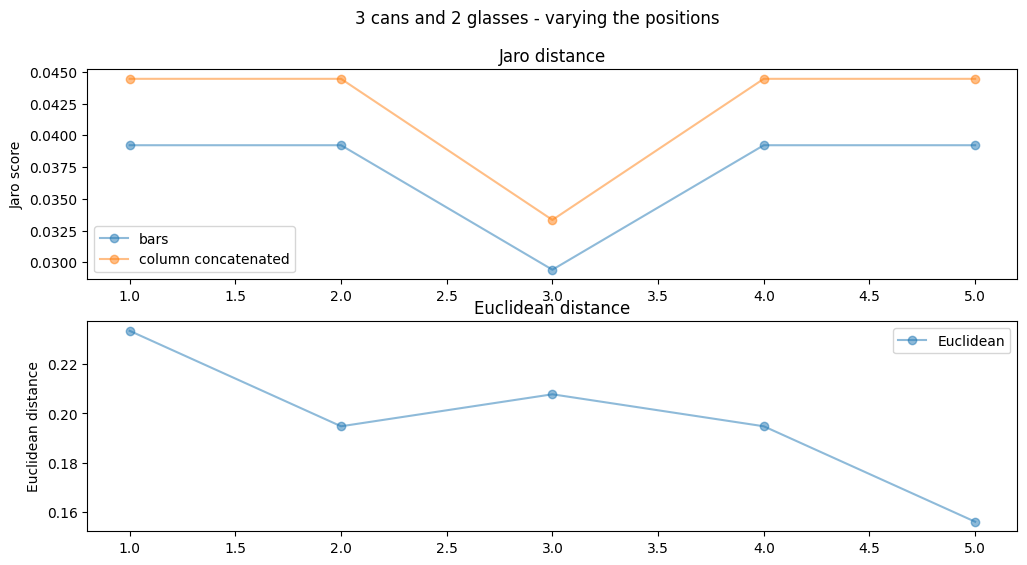

In [217]:
test_comparing_euclidean_jaro(LIST_VECTOR_A2, KEY_VECTOR_A, "3 cans and 2 glasses - varying the positions", test=True)